<a href="https://colab.research.google.com/github/ficorrea/data_science/blob/main/teste_ab/testes_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Algumas definições**

**T statistic**
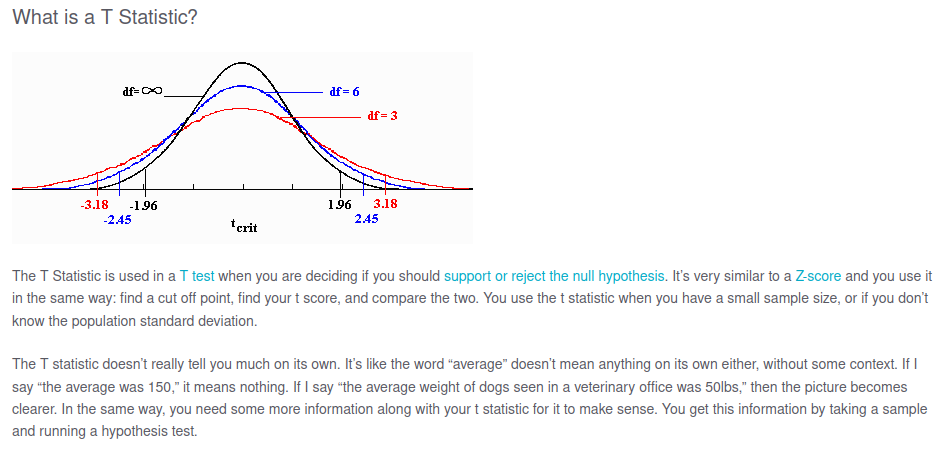

**Qual teste usar**

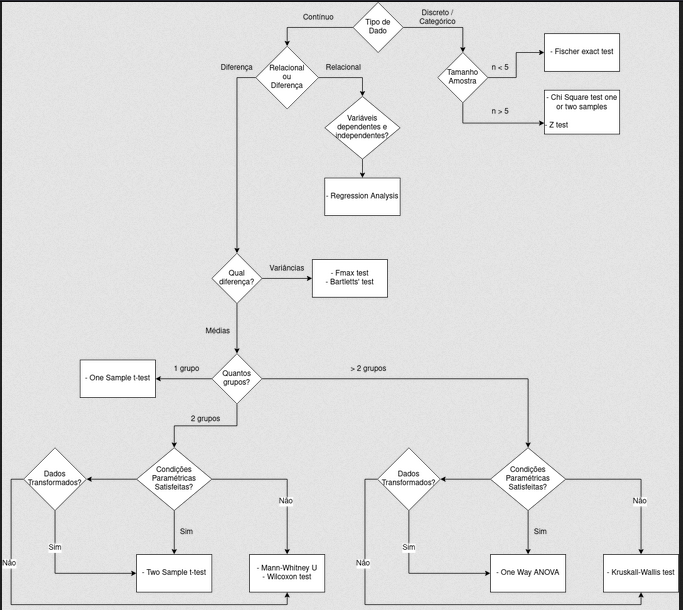

**F-test para cálculo de igualdade de variâncias:**

https://www.inf.ufsc.br/~andre.zibetti/probabilidade/teste-de-hipoteses.html#Testando_a_hipótese_da_igualdade_entre_as_variâncias

**Bartlett para cálculo de igualdade de variâncias:**

https://en.wikipedia.org/wiki/Bartlett%27s_test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html


### **Premissas:**

Para todos os exemplos o alpha = 0.05

Se p-value < alpha se rejeita-se a hipótese nula, assumindo-se a hipótese alternativa, caso contrário ocorre uma falha em rejeitá-la tomando essa como fato.

### **Primeiro exemplo - One-Sample test**

Descrição do problema: A média de uma certa planta é igual a 15cm? Foram coletadas a altura de 12 amostras aleatórias.

**Hipóteses:**

H0: u = 15 - Média do tamanho da espécie é 15cm;

H1: u <> 15 - Média do tamanho da espécie é diferente de 15cm;

In [ ]:
# Amostra aleatória
df = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

# Tipo de dado contínuo por se tratar de altura
# 1 grupo somente
# Buscar diferença de médias
# Teste ideal - One Sample t-test

In [ ]:
# Check média
import numpy as np
np.mean(df)

14.333333333333334

In [ ]:
# Média esperada = 15cm
# Média obtida com as amostras 14.33cm

from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(df, popmean=15)

print(f't_statistic: {t_statistic}')
print(f'p-value: {p_value}')

Stats: -1.6848470783484626
p-value: 0.12014460742498101


Por meio do resultado do p-value ocorreu uma falha na rejeição da hipótese nula o que significa que a média de tamanho da espécie é de fato 15cm.

### **Segundo exemplo - Two-Sample test**

**Condições Paramétricas satisfeitas**

Descrição do problema: Duas espécies de plantas diferentes possuem a mesma altura média? Foram coletadas 20 amostras aleatórias de plantas de cada espécie.

**Hipóteses:**

H0: u1 = u2 - Médias de altura das 2 espécies de plantas são iguais;

H1: u1 <> u2 - Médias de altura das 2 espécies de plantas são diferentes;

In [ ]:
import numpy as np

# Amostras aleatórias
df1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
df2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])

# Tipo de dado contínuo por se tratar de altura
# Diferença de médias
# 2 grupos
# Se condições paramétricas satisfeitas utilizar Two Sample t-test senão Mann-Whitney U ou Wilcoxon test

In [ ]:
# Médias
print(f'Média amostra 1: {np.mean(df1)}')
print(f'Média amostra 2: {np.mean(df2)}')

Média amostra 1: 15.15
Média amostra 2: 15.8


In [ ]:
# Condições paramétricas

# Amostras independentes - OK

# Normalmente distribuídas - OK
# Teste de shapiro para verificação de distribuição
# H0: Distribuição normal
# H1: Distribuição não normal
from scipy.stats import shapiro
test_statistic_df1, p_value_df1 = shapiro(df1)
test_statistic_df2, p_value_df2 = shapiro(df2)

print('Resultado Shapiro')
print(f'Test_statistic 1: {test_statistic_df1} | p_value 1: {p_value_df1}')
print(f'Test_statistic 2: {test_statistic_df2} | p_value 2: {p_value_df2}')

# Variâncias iguais - OK
print()
print('Variâncias')
print(f'Variância df1: {np.var(df1)}')
print(f'Variância df2: {np.var(df2)}')
print(f'Regra de menor 4 pra variância - Variância Maior / Variância Menor < 4: {np.var(df2) / np.var(df1) < 4}')

# É possível verificar o igualdade entre variâncias aplicando um F-test
# H0: s1² = s2² - Variâncias são iguais
# H1: s1² <> s2² - Variâncias são diferentes

def f_test(samp_1, samp_2):
    from scipy.stats import f
    
    f_test_statistic = np.var(samp_1, ddof=1) / np.var(samp_2, ddof=1) 
    # ddof -> “Delta Degrees of Freedom”: 
    # the divisor used in the calculation is N - ddof, 
    # where N represents the number of elements. By default ddof is zero.
    
    dfn = samp_1.size - 1 # define degrees of freedom numerator 
    dfd = samp_2.size - 1 # define degrees of freedom denominator

    p_value = 1 - f.cdf(f_test_statistic, dfn, dfd) # find p-value of F test statistic
    # The p-value corresponds to 1 – cdf of the F distribution with numerator 
    # degrees of freedom = n1-1 and denominator degrees of freedom = n2-1.
    
    return f_test_statistic, p_value

f_test_statistic, p_value = f_test(df1, df2)

print()
print('Resultado F-test')
print(f'F test statistic: {f_test_statistic}')
print(f'p-value: {p_value}')

Resultado Shapiro
Test_statistic 1: 0.9387214779853821 | p_value 1: 0.2267775684595108
Test_statistic 2: 0.9664195775985718 | p_value 2: 0.6782065033912659

Variâncias
Variância df1: 7.727500000000001
Variância df2: 12.260000000000002
Regra de menor 4 pra variância - Variância Maior / Variância Menor < 4: True

Resultado f-test
F test statistic: 0.6303017944535074
p-value: 0.838546147112371


Como observado para as 2 amostras o teste de Shapiro indicou que elas são normalmente distribuídas já que o p-value > alpha o que indica falha da rejeição da H0.

As variâncias apesar de serem diferentes tomou-se a seguinte abordagem:
**(variância maior / variância menor) < 4** indica que as mesmas são iguais;

O resultado F-test apresenta p-value > alpha o que indica uma falha na rejeição da hipótese nula, ou seja, as variâncias dos grupos são iguais;


In [ ]:
# Com as condições paramétricas atendidas, execução do teste
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df1, df2, equal_var=True)

print(f't_statistic: {t_statistic}')
print(f'p-value: {p_value}')

t_statistic: -0.6337397070250238
p-value: 0.5300471010405257


O resultado do p-value para o teste de hipótese indica que ocorreu falha em rejeitar a hipótese nula e com isso podemos definir que nã existe diferença entre na altura média das 2 espécies de plantas.

### **Terceiro Exemplo - Mann-Whitney U-test**

**Condições Paramétricas não satisfeitas**

Descrição do problema: Duas espécies de plantas diferentes possuem a mesma altura média? Foram coletadas 20 amostras aleatórias de plantas de cada espécie.

**Hipóteses:**

H0: u1 = u2 - Médias de altura das 2 espécies de plantas são iguais;

H1: u1 <> u2 - Médias de altura das 2 espécies de plantas são diferentes;

**Sobre o Welch's test -> Pesquisadores falam que esse tipo de teste é muito conservador no tipo de Erro I e oscila bastante em relação ao tamanho das amostras;**

In [ ]:
import numpy as np

# Amostras aleatórias
df1 = np.array([20, 23, 21, 20, 18, 17, 18, 14, 20, 24, 43, 19])
df2 = np.array([24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23])

# Tipo de dado contínuo por se tratar de altura
# Diferença de médias
# 2 grupos
# Se condições paramétricas satisfeitas utilizar Two Sample t-test senão Mann-Whitney U-test ou Wilcoxon test (Welch's test)

In [ ]:
# Médias
print(f'Média amostra 1: {np.mean(df1)}')
print(f'Média amostra 2: {np.mean(df2)}')

Média amostra 1: 21.416666666666668
Média amostra 2: 22.75


In [ ]:
# Condições paramétricas

# Amostras independentes - OK

# Normalmente distribuídas - OK somente para 2ª amostra
# Teste de shapiro para verificação de distribuição
# H0: Distribuição normal
# H1: Distribuição não normal
from scipy.stats import shapiro
test_statistic_df1, p_value_df1 = shapiro(df1)
test_statistic_df2, p_value_df2 = shapiro(df2)

print('Resultado Shapiro')
print(f'Test_statistic 1: {test_statistic_df1} | p_value 1: {p_value_df1}')
print(f'Test_statistic 2: {test_statistic_df2} | p_value 2: {p_value_df2}')

# Variâncias iguais - NOT OK
print()
print('Variâncias')
print(f'Variância df1: {np.var(df1)}')
print(f'Variância df2: {np.var(df2)}')
print(f'Regra de menor 4 pra variância - Variância Maior / Variância Menor < 4: {np.var(df1) / np.var(df2) < 4}')

# É possível verificar o igualdade entre variâncias aplicando um F-test
# H0: s1² = s2² - Variâncias são iguais
# H1: s1² <> s2² - Variâncias são diferentes

def f_test(samp_1, samp_2):
    from scipy.stats import f
    
    f_test_statistic = np.var(samp_1, ddof=1) / np.var(samp_2, ddof=1) 
    # ddof -> “Delta Degrees of Freedom”: 
    # the divisor used in the calculation is N - ddof, 
    # where N represents the number of elements. By default ddof is zero.
    
    dfn = samp_1.size - 1 # define degrees of freedom numerator 
    dfd = samp_2.size - 1 # define degrees of freedom denominator

    p_value = 1 - f.cdf(f_test_statistic, dfn, dfd) # find p-value of F test statistic
    # The p-value corresponds to 1 – cdf of the F distribution with numerator 
    # degrees of freedom = n1-1 and denominator degrees of freedom = n2-1.
    
    return f_test_statistic, p_value

f_test_statistic, p_value = f_test(df1, df2)

print()
print('Resultado F-test')
print(f'F test statistic: {f_test_statistic}')
print(f'p-value: {p_value}')

Resultado Shapiro
Test_statistic 1: 0.6801238656044006 | p_value 1: 0.0005459139938466251
Test_statistic 2: 0.9691913723945618 | p_value 2: 0.9021502137184143

Variâncias
Variância df1: 48.743055555555564
Variância df2: 9.6875
Regra de menor 4 pra variância - Variância Maior / Variância Menor < 4: False

Resultado F-test
F test statistic: 5.031541218637993
p-value: 0.006254330840811506


Como observado somente a 2ª amostra, por meio do teste de Shapiro, indicou que ela é normalmente distribuída já que o p-value > alpha o que indica falha da rejeição da H0.

As variâncias apesar de serem diferentes tomou-se a seguinte abordagem:
**(variância maior / variância menor) < 4** indica que as mesmas são diferentes;

O resultado F-test apresenta p-value < alpha o que indica rejeição da hipótese nula, ou seja, as variâncias dos grupos são diferentes;

In [ ]:
# Com as condições paramétricas não atendidas, execução do teste
from scipy.stats import mannwhitneyu
t_statistic, p_value = mannwhitneyu(df1, df2)

print(f't_statistic: {t_statistic}')
print(f'p-value: {p_value}')

t_statistic: 40.5
p-value: 0.07217495133598324


### **Quarto Exemplo - Kruskall-Wallis**

**Condições Paramétricas não satisfeitas**

Descrição do problema: Foram coletadas 5 amostras aleatórias de 4 grupos da mesma planta e se deseja verificar qual adubo apresentou diferença em relação ao grupo controle.

A - grupo controle

B - adubo tipo 1

C - adubo tipo 2

D - adubo tipo 3

**Hipóteses:**

H0: u1 = u2 = u3 = u4 - Médias de altura das plantas são iguais;

H1: u1 <> u2 <> u3 <> u4 - Médias de altura das plantas são diferentes;

In [ ]:
import pandas as pd

# Amostras aleatórias

data = {'A': [25, 30, 28, 36, 29],
        'B': [45, 55, 29, 56, 40],
        'C': [30, 29, 33, 37, 27],
        'D': [54, 60, 51, 62, 73]}

df = pd.DataFrame(data)

# Tipo de dado contínuo por se tratar de altura
# Diferença de médias
# > 2 grupos
# Se condições paramétricas satisfeitas utilizar One-way ANOVA senão Kruskall-Wallis test

In [ ]:
# Necessário tratamento da base para utilização nos testes
df_adj = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_adj.columns = ['index', 'treatment', 'value']
df_adj.head()

,index,treatment,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


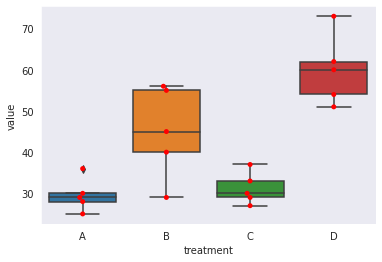

In [ ]:
# Analisando bloxplot com distribuição dos dados
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

sns.boxplot(data=df_adj, x='treatment', y='value')
sns.swarmplot(data=df_adj, x='treatment', y='value', color='r') # exibe os pontos
plt.show()

Apesar de apresentar diferenças não é indicado utilizar o boxplot para hipóteses estatísticas porque os dados podem não ter sido desenhados pro teste desejado.

In [ ]:
# Condições paramétricas

# Amostras independentes - OK

# Normalmente distribuídas - OK
# Teste de shapiro para verificação de distribuição
# H0: Distribuição normal
# H1: Distribuição não normal
from scipy.stats import shapiro
test_statistic_dfA, p_value_dfA = shapiro(df['A'])
test_statistic_dfB, p_value_dfB = shapiro(df['B'])
test_statistic_dfC, p_value_dfC = shapiro(df['C'])
test_statistic_dfD, p_value_dfD = shapiro(df['D'])

print('Resultado Shapiro')
print(f'Test_statistic A: {test_statistic_dfA} | p_value A: {p_value_dfA}')
print(f'Test_statistic B: {test_statistic_dfB} | p_value B: {p_value_dfB}')
print(f'Test_statistic C: {test_statistic_dfC} | p_value C: {p_value_dfC}')
print(f'Test_statistic D: {test_statistic_dfD} | p_value D: {p_value_dfD}')

# Variâncias iguais - NOT OK
from itertools import combinations
groups = list(combinations(['A', 'B', 'C', 'D'], 2))

print()
print('Variâncias')
print(f'Variância dfA: {np.var(df["A"])}')
print(f'Variância dfB: {np.var(df["B"])}')
print(f'Variância dfC: {np.var(df["C"])}')
print(f'Variância dfD: {np.var(df["D"])}')

def calc_diff_variances(groups):

    all_vars = {
        'A': np.var(df["A"]),
        'B': np.var(df["B"]),
        'C': np.var(df["C"]),
        'D': np.var(df["D"])}

    for gp in groups:
        get_vars_list = [all_vars[gp[0]], all_vars[gp[1]]]
        max_var_pos = get_vars_list.index(max(get_vars_list))
        min_var_pos = get_vars_list.index(min(get_vars_list))
        print(f'Diferença da variância: {gp[max_var_pos]} / {gp[min_var_pos]} = ' 
              f'{all_vars[gp[max_var_pos]] / all_vars[gp[min_var_pos]]}'
              f'\t{all_vars[gp[max_var_pos]] / all_vars[gp[min_var_pos]] < 4}')

calc_diff_variances(groups)
print()

# É possível verificar o igualdade entre variâncias aplicando um F-test
# H0: s1² = s2² - Variâncias são iguais
# H1: s1² <> s2² - Variâncias são diferentes

def f_test(samp_1, samp_2):
    from scipy.stats import f
    
    f_test_statistic = np.var(samp_1, ddof=1) / np.var(samp_2, ddof=1) 
    # ddof -> “Delta Degrees of Freedom”: 
    # the divisor used in the calculation is N - ddof, 
    # where N represents the number of elements. By default ddof is zero.
    
    dfn = samp_1.size - 1 # define degrees of freedom numerator 
    dfd = samp_2.size - 1 # define degrees of freedom denominator

    p_value = 1 - f.cdf(f_test_statistic, dfn, dfd) # find p-value of F test statistic
    # The p-value corresponds to 1 – cdf of the F distribution with numerator 
    # degrees of freedom = n1-1 and denominator degrees of freedom = n2-1.
    
    return f_test_statistic, p_value

print('Resultados F-test')
for gp in groups:
    f_test_statistic, p_value = f_test(df[gp[0]], df[gp[1]])
    print(f'Grupo {gp[0]} - {gp[1]}')
    print(f'F test statistic: {f_test_statistic}')
    print(f'p-value: {p_value}')
    print('-------------------------')

Resultado Shapiro
Test_statistic A: 0.9316344261169434 | p_value A: 0.6075581908226013
Test_statistic B: 0.9264494776725769 | p_value B: 0.5723667740821838
Test_statistic C: 0.9529604315757751 | p_value C: 0.7583119869232178
Test_statistic D: 0.9448273181915283 | p_value D: 0.7002365589141846

Variâncias
Variância dfA: 13.040000000000001
Variância dfB: 100.4
Variância dfC: 12.16
Variância dfD: 58.0
Diferença da variância: B / A = 7.699386503067484	False
Diferença da variância: A / C = 1.0723684210526316	True
Diferença da variância: D / A = 4.447852760736196	False
Diferença da variância: B / C = 8.256578947368421	False
Diferença da variância: B / D = 1.7310344827586208	True
Diferença da variância: D / C = 4.769736842105263	False

Resultados F-test
Grupo A - B
F test statistic: 0.1298804780876494
p-value: 0.9633968892928697
-------------------------
Grupo A - C
F test statistic: 1.0723684210526316
p-value: 0.4738201698080762
-------------------------
Grupo A - D
F test statistic: 0.22482

In [ ]:
# Com as condições paramétricas não atendidas, execução do teste
from scipy.stats import kruskal
t_statistic, p_value = kruskal(df['A'], df['B'], df['C'], df['D'])

print(f't_statistic: {t_statistic}')
print(f'p-value: {p_value}')

t_statistic: 12.80528301886792
p-value: 0.005077184748010414


Pelo resultado apresentado houve uma diferença no valor das médias, ou seja, o uso de algum adubo apresentou um resultado de melhora no crescimento das plantas, mas esse resultado não apresenta em quais grupos foram observadas diferenças. Para isso usa-se o código abaixo para essa comparação.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(endog=df_adj['value'], groups=df_adj['treatment'], alpha=0.05)
print(result.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


### **Quinto Exemplo - One-Way ANOVA**

**Condições Paramétricas satisfeitas**

Descrição do problema: Foram coletadas 5 amostras aleatórias de 4 grupos da mesma planta e se deseja verificar qual adubo apresentou diferença em relação ao grupo controle.

A - grupo controle

B - adubo tipo 1

C - adubo tipo 2

D - adubo tipo 3

**Hipóteses:**

H0: u1 = u2 = u3 = u4 - Médias de altura das plantas são iguais;

H1: u1 <> u2 <> u3 <> u4 - Médias de altura das plantas são diferentes;

In [ ]:
import pandas as pd

# Amostras aleatórias

data = {'A': [25, 30, 28, 36, 29],
        'B': [36, 22, 29, 39, 40],
        'C': [30, 29, 33, 37, 27],
        'D': [40, 30, 35, 25, 23]}

df = pd.DataFrame(data)

# Tipo de dado contínuo por se tratar de altura
# Diferença de médias
# > 2 grupos
# Se condições paramétricas satisfeitas utilizar One-way ANOVA senão Kruskall-Wallis test

In [ ]:
# Necessário tratamento da base para utilização nos testes
df_adj = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_adj.columns = ['index', 'treatment', 'value']
df_adj.head()

,index,treatment,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


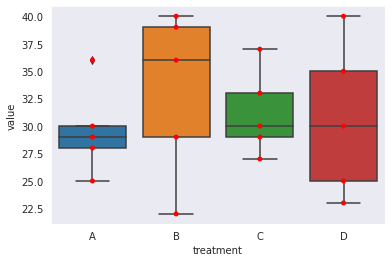

In [ ]:
# Analisando bloxplot com distribuição dos dados
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

sns.boxplot(data=df_adj, x='treatment', y='value')
sns.swarmplot(data=df_adj, x='treatment', y='value', color='r') # exibe os pontos
plt.show()

In [ ]:
# Condições paramétricas

# Amostras independentes - OK

# Normalmente distribuídas - OK
# Teste de shapiro para verificação de distribuição
# H0: Distribuição normal
# H1: Distribuição não normal
from scipy.stats import shapiro
test_statistic_dfA, p_value_dfA = shapiro(df['A'])
test_statistic_dfB, p_value_dfB = shapiro(df['B'])
test_statistic_dfC, p_value_dfC = shapiro(df['C'])
test_statistic_dfD, p_value_dfD = shapiro(df['D'])

print('Resultado Shapiro')
print(f'Test_statistic A: {test_statistic_dfA} | p_value A: {p_value_dfA}')
print(f'Test_statistic B: {test_statistic_dfB} | p_value B: {p_value_dfB}')
print(f'Test_statistic C: {test_statistic_dfC} | p_value C: {p_value_dfC}')
print(f'Test_statistic D: {test_statistic_dfD} | p_value D: {p_value_dfD}')

# Variâncias iguais - OK
from itertools import combinations
import numpy as np
groups = list(combinations(['A', 'B', 'C', 'D'], 2))

print()
print('Variâncias')
print(f'Variância dfA: {np.var(df["A"])}')
print(f'Variância dfB: {np.var(df["B"])}')
print(f'Variância dfC: {np.var(df["C"])}')
print(f'Variância dfD: {np.var(df["D"])}')

def calc_diff_variances(groups):

    all_vars = {
        'A': np.var(df["A"]),
        'B': np.var(df["B"]),
        'C': np.var(df["C"]),
        'D': np.var(df["D"])}

    for gp in groups:
        get_vars_list = [all_vars[gp[0]], all_vars[gp[1]]]
        max_var_pos = get_vars_list.index(max(get_vars_list))
        min_var_pos = get_vars_list.index(min(get_vars_list))
        print(f'Diferença da variância: {gp[max_var_pos]} / {gp[min_var_pos]} = ' 
              f'{all_vars[gp[max_var_pos]] / all_vars[gp[min_var_pos]]}'
              f'\t{all_vars[gp[max_var_pos]] / all_vars[gp[min_var_pos]] < 4}')

calc_diff_variances(groups)
print()

# É possível verificar o igualdade entre variâncias aplicando um F-test
# H0: s1² = s2² - Variâncias são iguais
# H1: s1² <> s2² - Variâncias são diferentes

def f_test(samp_1, samp_2):
    from scipy.stats import f
    
    f_test_statistic = np.var(samp_1, ddof=1) / np.var(samp_2, ddof=1) 
    # ddof -> “Delta Degrees of Freedom”: 
    # the divisor used in the calculation is N - ddof, 
    # where N represents the number of elements. By default ddof is zero.
    
    dfn = samp_1.size - 1 # define degrees of freedom numerator 
    dfd = samp_2.size - 1 # define degrees of freedom denominator

    p_value = 1 - f.cdf(f_test_statistic, dfn, dfd) # find p-value of F test statistic
    # The p-value corresponds to 1 – cdf of the F distribution with numerator 
    # degrees of freedom = n1-1 and denominator degrees of freedom = n2-1.
    
    return f_test_statistic, p_value

print('Resultados F-test')
for gp in groups:
    f_test_statistic, p_value = f_test(df[gp[0]], df[gp[1]])
    print(f'Grupo {gp[0]} - {gp[1]}')
    print(f'F test statistic: {f_test_statistic}')
    print(f'p-value: {p_value}')
    print('-------------------------')

Resultado Shapiro
Test_statistic A: 0.9316344261169434 | p_value A: 0.6075581908226013
Test_statistic B: 0.8955857753753662 | p_value B: 0.3859711289405823
Test_statistic C: 0.9529604315757751 | p_value C: 0.7583119869232178
Test_statistic D: 0.9535078406333923 | p_value D: 0.7622088193893433

Variâncias
Variância dfA: 13.040000000000001
Variância dfB: 46.16
Variância dfC: 12.16
Variância dfD: 39.44
Diferença da variância: B / A = 3.5398773006134965	True
Diferença da variância: A / C = 1.0723684210526316	True
Diferença da variância: D / A = 3.024539877300613	True
Diferença da variância: B / C = 3.796052631578947	True
Diferença da variância: B / D = 1.1703853955375254	True
Diferença da variância: D / C = 3.2434210526315788	True

Resultados F-test
Grupo A - B
F test statistic: 0.2824956672443675
p-value: 0.8758176070519021
-------------------------
Grupo A - C
F test statistic: 1.0723684210526316
p-value: 0.4738201698080762
-------------------------
Grupo A - D
F test statistic: 0.330628

In [ ]:
# Com as condições paramétricas atendidas, execução do teste
from scipy.stats import f_oneway
t_statistic, p_value = f_oneway(df['A'], df['B'], df['C'], df['D'])

print(f't_statistic: {t_statistic}')
print(f'p-value: {p_value}')

t_statistic: 0.3326113116726835
p-value: 0.8019081778775646


Pelo resultado apresentado não houve diferença no valor das médias, ou seja, o uso de algum adubo não proporcionou um resultado de melhora no crescimento das plantas. Se for necessário verificar os valores encontrados para cada par de conjuntos utilzar o código abaixo para essa comparação.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(endog=df_adj['value'], groups=df_adj['treatment'], alpha=0.05)
print(result.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      3.6 0.7492  -7.0483 14.2483  False
     A      C      1.6    0.9  -9.0483 12.2483  False
     A      D      1.0    0.9  -9.6483 11.6483  False
     B      C     -2.0    0.9 -12.6483  8.6483  False
     B      D     -2.6  0.894 -13.2483  8.0483  False
     C      D     -0.6    0.9 -11.2483 10.0483  False
-----------------------------------------------------
